In [1]:
import torch
from torchvision import datasets, transforms
from torch import optim
from torch import nn
import helper

Fashion-MNIST is a set of 28x28 greyscale images of clothes

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

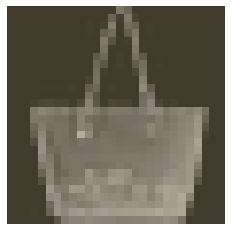

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Neural Network Architecture

In [4]:
# ########## Initializing Model, Loss & Optimizer ##########
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003) #Initailizing Adam Optimizer with Learnrate = 0.003

epochs = 5
for i in range(epochs):                                #Each epoch trains NN with 938 batches of 64 images, labels
    running_loss = 0
    for images,labels in trainloader:                  #Loading batch of 64 images(Shape 64,1,28,28), labels in each iteration
        images = images.view(len(images),-1)           #Reshaping batch of 64 images into single vector (64,784) or (64,28*28)
        optimizer.zero_grad()                          #Clear the gradients, else gradients are accumulated
        logps = model(images)                          #Forward pass
        loss = criterion(logps, labels)                #Calculating loss
        loss.backward()                                #Calculating gradient
        optimizer.step()                               #Back Propogation - updating weights
        
        running_loss += loss.item()                    #Appending Loss
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5156420997655722
Training loss: 0.3903251954519164
Training loss: 0.35731698764063147
Training loss: 0.33490930454753864
Training loss: 0.31622189481947216


In [5]:
def prob_display():
    images, labels = next(iter(trainloader))

    img = images[0].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    helper.view_classify(img.view(1, 28, 28), ps, version = "Fashion")

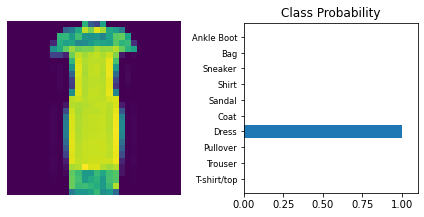

In [11]:
prob_display()

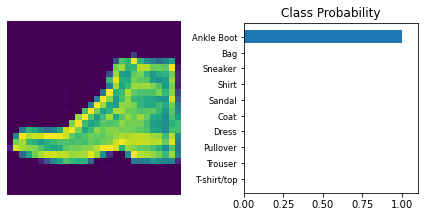

In [16]:
prob_display()

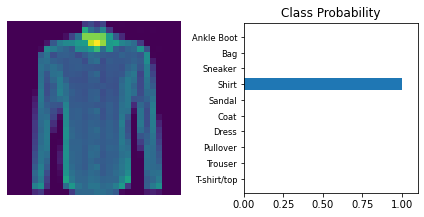

In [10]:
prob_display()

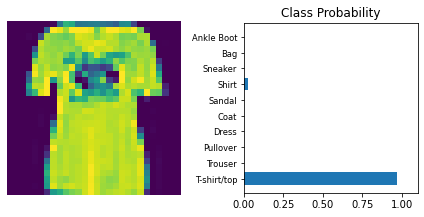

In [13]:
prob_display()